# Analysis of Tecan plate reader data 

In [317]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import log, exp
import pandas as pd
from lmfit import Model
import seaborn as sns
sns.set_style('ticks')
context = 'poster'
sns.set_context(context, font_scale=1.5, rc={'figure.figsize':(8.6, 5.9)})

In [318]:
import curveball

In [319]:
filename = r"D:\Dropbox\ex silico\tecan\Yoav_040515_7_strains.xlsx"

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


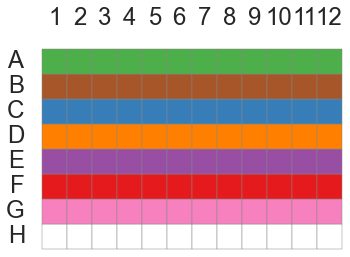

In [343]:
plate = pd.read_csv(r"d:/dropbox/ex silico/tecan/plate_Yoav_040515_7_strains.csv")
plate.Strain[plate.Strain=='12s'] = 'DH12S'
plate.Strain[plate.Strain=='DH5alfa'] = 'DH5a'

fig,ax = curveball.plots.plot_plate(plate)

In [344]:
print filename
#df = curveball.ioutils.read_tecan_mat(filename, max_time=max_time, plate=plate)
df = curveball.ioutils.read_tecan_xlsx(filename, 'OD', max_time=24, plate=plate)
print df.shape
df.head()

D:\Dropbox\ex silico\tecan\Yoav_040515_7_strains.xlsx
(11328, 9)


,Time,Temp. [°C],Cycle Nr.,Well,OD,Row,Col,Color,Strain
0,0.000000,24.5,1,A1,0.1470,A,1,#4daf4a,DH5a
1,0.187917,30.2,2,A1,0.1455,A,1,#4daf4a,DH5a
2,0.375861,30.0,3,A1,0.1454,A,1,#4daf4a,DH5a
3,0.563778,29.9,4,A1,0.1467,A,1,#4daf4a,DH5a
4,0.751722,30.1,5,A1,0.1476,A,1,#4daf4a,DH5a


['#4daf4a' '#a65628' '#377eb8' '#ff7f00' '#984ea3' '#e41a1c' '#f781bf' '#ffffff']
['DH5a' 'TG1' 'XL1Blue' 'MG1655' '17s' 'DH12S' 'BL21' 'blank']


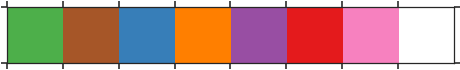

In [345]:
sns.palplot(df.Color.unique())
print df.Color.unique()
print df.Strain.unique()

In [346]:
#df = df[(df.Strain=='DH5a') | (df.Strain=='TG1') | (df.Strain=='DH12S') ]

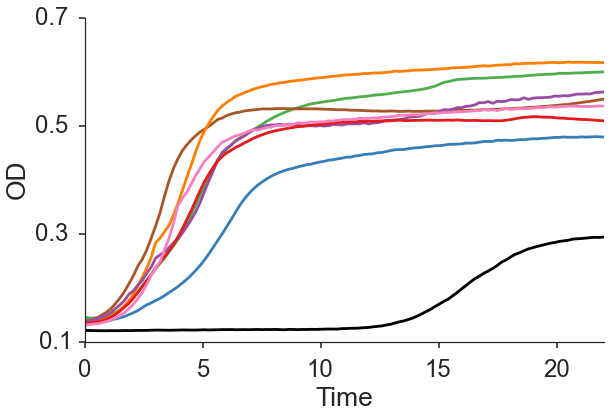

In [347]:
g = curveball.plots.tsplot(df, ci_level=0)
g.get_legend().set_visible(False)
#plt.legend(loc='upper left')
plt.yticks([0.1,0.3,0.5,0.7])
fig = g.get_figure()
fig.tight_layout()
fig.savefig('tsplot_%s.png' % context, bbox_inches='tight')

In [325]:
#curveball.plots.plot_wells(df)

In [349]:
G_strain = 'DH12S'
R_strain = 'MG1655'
df = df[df.Time < 12]
df.Time -= 2
df = df[df.Time > 0]

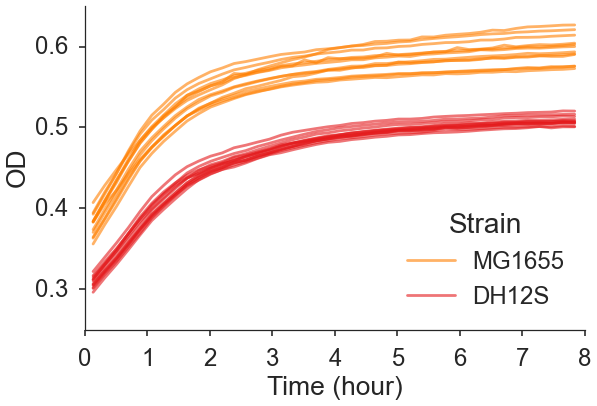

In [383]:
for well in df[(df.Strain==G_strain) | (df.Strain==R_strain)].Well.unique():
    df_well = df[df.Well == well]
    color = df_well.Color.unique()[0]
    plt.plot(df_well.Time, df_well.OD, color=color, alpha=0.6)

plt.xlabel('Time (hour)')
plt.ylabel('OD')
sns.despine()
plt.tight_layout()
plt.yticks([0.3,0.4,0.5,0.6])
plt.ylim(0.25,0.65)
plt.gca().get_lines()[0].set_label(R_strain)
plt.gca().get_lines()[-1].set_label(G_strain)
lg = plt.legend(loc='lower right')
lg.set_title('Strain', {'size':28})
plt.savefig('all_curves_%s.png' % context, bbox_inches='tight')

# Model fitting

[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 1987
    # data points      = 42
    # variables        = 4
    chi-square         = 5.297
    reduced chi-square = 0.139
[[Variables]]
    y0:   0.29336360 +/- 0.001998 (0.68%) (init= 0.3087)
    r:    956.607266 +/- 1.16e+05 (12095.03%) (init= 1.0247)
    K:    0.50705522 +/- 0.000618 (0.12%) (init= 0.5087)
    nu:   0.00075442 +/- 0.091219 (12091.30%) (init= 1)

Model(richards_function) 4
Model(baranyi_roberts_function) 6
Model(logistic_function) 3
Model(baranyi_roberts_function) 5


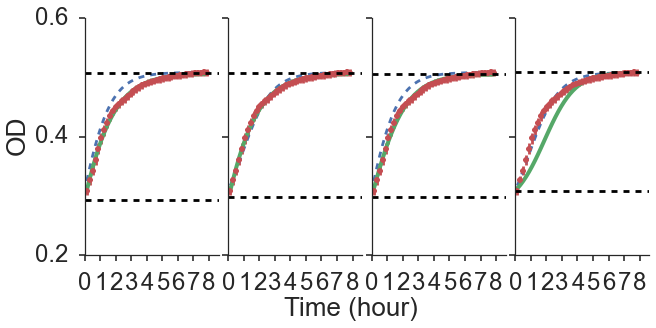

In [351]:
G_models,fig,ax = curveball.models.fit_model(df[df.Strain==G_strain], use_weights=True)
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,6,12])
plt.setp(ax, yticks=[0.2,0.4,0.6])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("G_models.png", bbox_inches='tight')
for m in G_models:
    print m.model.name, m.nvarys

[[Model]]
    Model(richards_function)
[[Fit Statistics]]
    # function evals   = 1500
    # data points      = 42
    # variables        = 4
    chi-square         = 2.041
    reduced chi-square = 0.054
[[Variables]]
    y0:   0.36093627 +/- 0.003087 (0.86%) (init= 0.3796083)
    r:    745.404529 +/- 1.64e+05 (22024.68%) (init= 1.214689)
    K:    0.59012109 +/- 0.000962 (0.16%) (init= 0.5973583)
    nu:   0.00116952 +/- 0.257589 (22025.09%) (init= 1)

Model(richards_function) 4
Model(baranyi_roberts_function) 6
Model(logistic_function) 3
Model(baranyi_roberts_function) 5


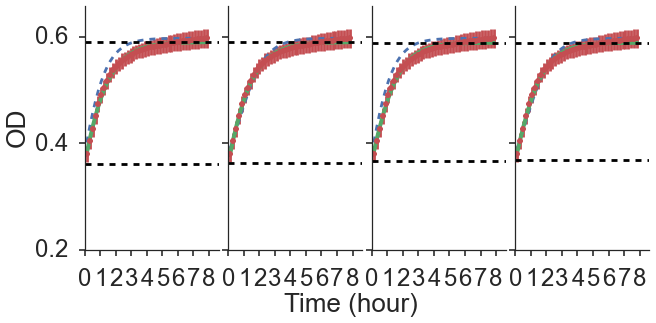

In [352]:
R_models,fig,ax = curveball.models.fit_model(df[df.Strain==R_strain])
plt.setp(ax, title='')
#plt.setp(ax, xticks=[0,20,40])
plt.setp(ax, yticks=[0.2,0.4,0.6])
plt.setp(ax, xlabel='')
fig.text(0.4, -0.1, 'Time (hour)', fontsize=26)
fig.tight_layout()
fig.set_figwidth(8.6)
fig.set_figheight(5.9*2/3.)
fig.savefig("R_models.png", bbox_inches='tight')
for m in R_models:
    print m.model.name, m.nvarys

In [353]:
print "G:"
print G_models[0].best_values, 
print "lag:", curveball.models.find_lag(G_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(G_models[0], PLOT=False)[-1]

print "R:"
print R_models[0].best_values,
print "lag:", curveball.models.find_lag(R_models[0], PLOT=False), 
print "mu:", curveball.models.find_max_growth(R_models[0], PLOT=False)[-1]

G:
{'y0': 0.29336360456561184, 'K': 0.50705522193087615, 'r': 956.60726674603336, 'nu': 0.00075442316389495723} lag: -1.09944504844e-13 mu: 0.382079245703
R:
{'y0': 0.36093627487872459, 'K': 0.59012109186821382, 'r': 745.40452931605523, 'nu': 0.0011695282127359707} lag: 1.86893655333e-13 mu: 0.413103487417


In [354]:
G_color = plate.Color[plate.Strain==G_strain].unique()[0]
R_color = plate.Color[plate.Strain==R_strain].unique()[0]

In [355]:
gm = G_models[0]
rm = R_models[0]

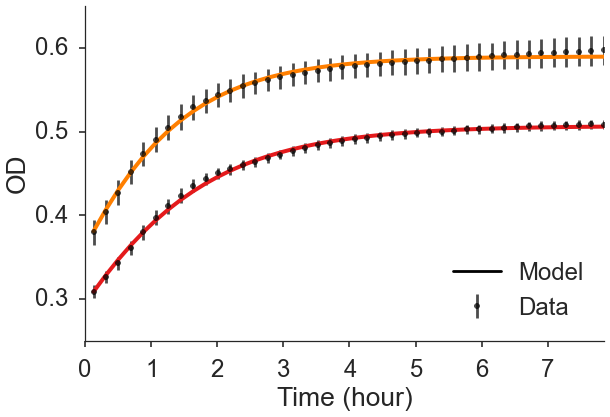

In [368]:
fig,ax = plt.subplots(1, 1)

ax.plot([-1],[0], color='k', label='Model')
ax.plot(df.Time.unique(), gm.best_fit, color=G_color, lw=4)#, label='G')
ax.errorbar(df.Time.unique(), gm.data, 1./gm.weights, color='k', ls='', marker='.', label='Data', alpha=0.7)
ax.plot(df.Time.unique(), rm.best_fit, color=R_color, lw=4)#, label='R')
ax.errorbar(df.Time.unique(), rm.data, 1./rm.weights, color='k', ls='', marker='.', alpha=0.7)

ax.set_xlim(0,df.Time.max())
ax.legend(loc='lower right')
#ax.legend().set_visible(False)
ax.set_ylabel('OD')
ax.set_xlabel('Time (hour)')
ax.set_title('')
ax.set_yticks([0.3,0.4,0.5,0.6])
ax.set_ylim(0.25,0.65)
sns.despine()
fig.tight_layout()
fig.savefig('model_fits_%s.png' % context, bbox_inches='tight')

# Competition simulation

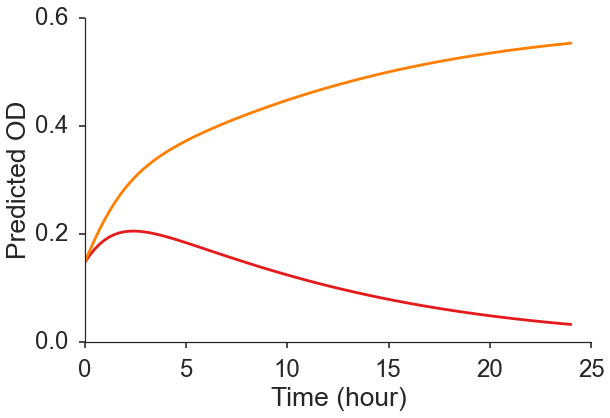

In [357]:
t,y,fig,ax = curveball.competitions.compete(G_models[0], R_models[0], hours=24, PLOT=True)
ax.lines[0].set_color(G_color)
ax.lines[1].set_color(R_color)
ax.set_yticks([0,0.2,0.4,0.6])
ax.set_ylabel('Predicted OD')
#ax.legend(["G","R"], loc='lower right')
#ax.set_title("G vs R")
fig.tight_layout()
fig.savefig("competition_%s.png" % context, bbox_inches='tight')

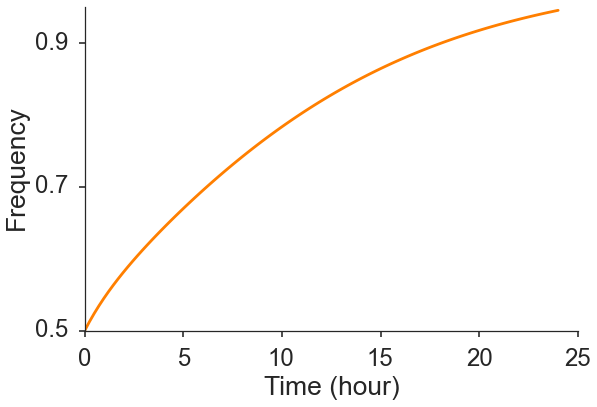

In [358]:
p = y[:,1] / y.sum(axis=1)
plt.plot(t, p, color=R_color)
plt.xlabel('Time (hour)')
plt.ylabel('Frequency')
sns.despine()
plt.tight_layout()
plt.yticks([0.5,0.7,0.9])
plt.savefig("frequency_%s.png" % context, bbox_inches='tight')

LTEE (Wiser & Lenski 2015):
$$
s = 1 - \frac{\log{\frac{A_t}{A_0}}}{\log{\frac{B_t}{B_0}}} = 1 - \frac{\log{A_t} - \log{A_0}}{\log{B_t} - \log{B_0}}
$$

Chevin 2011:
$$
s = \frac{d}{dt} \log{\frac{p}{1-p}}
$$

Kimura & Crow 1970:
$$
s = \frac{1}{t} \log{\frac{A_t B_0}{A_0 B_t}} = \frac{\log{A_t} + \log{B_0} - \log{A_0} - \log{B_t}}{t}
$$

In [359]:
s_LTEE = lambda i: 1 - np.log(y[i,0]/(y[0,0])) / np.log(y[i,1]/y[0,1])
s_KC70 = lambda i: 1./t[i] * np.log(y[i,1] * y[0,0] / (y[0,1] * y[i,0])) 
s = lambda p,t: np.gradient(np.log(y[:,1]/y[:,0]), t)

In [360]:
from lmfit import Model

def logistic(t, p0, s):
    return p0 / ( p0 + (1 - p0) * np.exp(-s * t) )
model = Model(logistic)

<Parameter 'p0', value=0.5236632285990469 +/- 0.00116, bounds=[-inf:inf]>
<Parameter 's', value=0.11801465634772046 +/- 0.00054, bounds=[-1:1]>


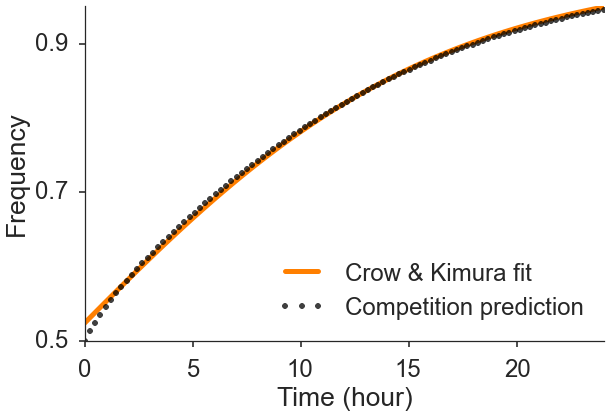

In [374]:
params = model.make_params(p0=p[0], s=0)
params['s'].set(min=-1,max=1)
params['p0'].set(vary=True)
fit = model.fit(p, t=t, params=params)
ax = fit.plot_fit(
    data_kws={'marker':'.', 'color':'k', 'alpha':0.75}, 
    fit_kws={'lw':5, 'color':R_color}, 
    init_kws={'ls':''}
)

ax.get_lines()[0].set_label('')
ax.get_lines()[1].set_label('Crow & Kimura fit')
ax.get_lines()[2].set_label('Competition prediction')
ax.set_xlim(0, t.max())
ax.legend(loc='lower right', numpoints=3)#.set_visible(False)
ax.set_title('')
ax.set_ylabel('Frequency')
ax.set_xlabel('Time (hour)')
ax.set_yticks([0.5,0.7, 0.9])
sns.despine()
print fit.params['p0']
print fit.params['s']
plt.tight_layout()
ax.figure.savefig('frequency_fit_%s.png' % context, bbox_inches='tight')